### Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.


Dataset Description

employee_id	Unique ID for employee
department	Department of employee
region	Region of employment (unordered)
education	Education Level
gender	Gender of Employee
recruitment_channel	Channel of recruitment for employee
no_of_trainings	no of other trainings completed in previous year on soft skills, technical skills etc.
age	Age of Employee
previous_year_rating	Employee Rating for the previous year
length_of_service	Length of service in years
KPIs_met >80%	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
awards_won?	if awards won during previous year then 1 else 0
avg_training_score	Average score in current training evaluations
is_promoted	(Target) Recommended for promotion


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train_LZdllcl.csv")

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.shape

(54808, 14)

In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
train = train.dropna()

In [7]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [8]:
target = train.is_promoted

In [9]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
# train_treated
# numerical = train.select_dtypes(include = np.number)
# nonnumerical = train.select_dtypes(exclude = np.number)

In [ ]:
# numerical.head()

#### Feature Exploration

In [10]:
train.is_promoted.value_counts().sort_index()

0    44428
1     4232
Name: is_promoted, dtype: int64

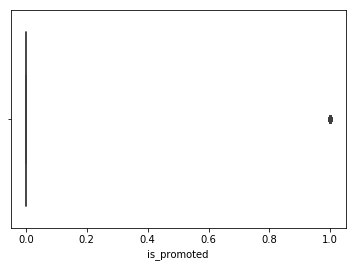

In [11]:
# plt.figure(figsize=(12,12))
sns.boxplot(train.is_promoted)

In [12]:
train.no_of_trainings.value_counts().sort_index()

1     39400
2      7107
3      1579
4       402
5       116
6        34
7        10
8         4
9         3
10        5
Name: no_of_trainings, dtype: int64

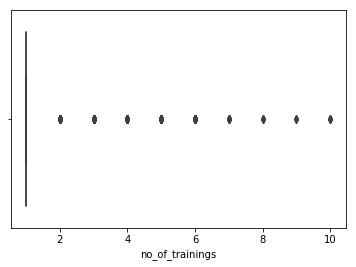

In [13]:
sns.boxplot(train.no_of_trainings)

In [14]:
train.age.value_counts().sort_index() 

20      51
21      29
22      84
23     144
24     362
25     784
26    1472
27    2015
28    2301
29    2731
30    3202
31    3268
32    3389
33    3106
34    2989
35    2637
36    2451
37    2117
38    1875
39    1647
40    1616
41    1254
42    1127
43     962
44     824
45     739
46     684
47     539
48     548
49     434
50     507
51     378
52     343
53     345
54     305
55     284
56     263
57     235
58     207
59     202
60     210
Name: age, dtype: int64

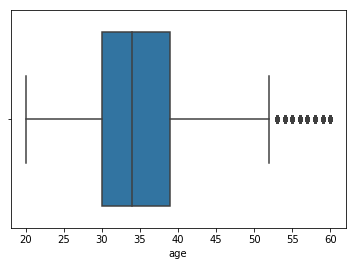

In [15]:
sns.boxplot(train.age)

In [ ]:
# numerical.columns

In [16]:
train.previous_year_rating.value_counts().sort_index()

1.0     5887
2.0     4035
3.0    17867
4.0     9509
5.0    11362
Name: previous_year_rating, dtype: int64

In [17]:
train.length_of_service.value_counts().sort_index()

1      380
2     6185
3     6680
4     6585
5     5622
6     4582
7     5385
8     2804
9     2555
10    2140
11     892
12     776
13     660
14     536
15     580
16     539
17     426
18     384
19     319
20     128
21      74
22      60
23      62
24      67
25      49
26      41
27      36
28      29
29      30
30      12
31      19
32       9
33       9
34       4
37       1
Name: length_of_service, dtype: int64

In [18]:
train["KPIs_met >80%"].value_counts().sort_index()

0    31314
1    17346
Name: KPIs_met >80%, dtype: int64

In [19]:
train["awards_won?"].value_counts().sort_index()

0    47534
1     1126
Name: awards_won?, dtype: int64

In [20]:
train["avg_training_score"].value_counts().sort_index()

39       2
40       4
41      24
42      53
43     150
44     284
45     569
46     968
47    1492
48    2081
49    2287
50    2303
51    1980
52    1594
53    1110
54     866
55     773
56     963
57    1319
58    1729
59    1887
60    1988
61    1711
62    1296
63     930
64     655
65     550
66     532
67     673
68     866
      ... 
70     981
71     831
72     669
73     484
74     400
75     377
76     471
77     629
78     846
79    1055
80    1087
81    1226
82    1300
83    1061
84    1024
85     940
86     789
87     562
88     386
89     262
90     168
91     108
92      90
93      76
94      56
95      40
96      42
97      39
98      32
99      34
Name: avg_training_score, Length: 61, dtype: int64

In [ ]:
# numerical.columns

'employee_id'- drop
'no_of_trainings'-bin
'age'-bin
'previous_year_rating'- contains null (drop null)
'length_of_service'- possible binning
'KPIs_met >80%'
'awards_won?'
'avg_training_score'
'is_promoted'- imbalanced - resampling

### Working on Numerical Features

In [ ]:
# numerical.isna().sum()

In [ ]:
# numerical_treated = numerical.copy(deep=True)

In [ ]:
# numerical_treated = numerical.dropna()

In [ ]:
# numerical_treated.isna().sum()

In [21]:
# numerical_treated = numerical_treated.drop(columns=["employee_id"])
train_treated = train.drop(columns=["employee_id"])

In [22]:
def age(df):
    df.loc[df['age'] <= 28, 'age'] = 1
    df.loc[(df['age'] > 28) & (df['age'] <= 36), 'age'] = 2
    df.loc[(df['age'] > 36) & (df['age'] <= 44), 'age'] = 3
    df.loc[(df['age'] > 44) & (df['age'] <= 52), 'age'] = 4
    df.loc[(df['age'] > 52) & (df['age'] <= 60), 'age'] = 5    
        
    return df

In [23]:
age(train_treated)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,2,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,2,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,2,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,4,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,2,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,2,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,m,sourcing,1,2,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,m,other,1,1,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,2,5.0,5,1,0,54,0


In [24]:
def no_of_trainings(df):
    df.loc[df['no_of_trainings'] <= 1, 'no_of_trainings'] = 1
    df.loc[(df['no_of_trainings'] > 1) & (df['no_of_trainings'] <= 5), 'no_of_trainings'] = 2
    df.loc[(df['no_of_trainings'] > 5) & (df['no_of_trainings'] <= 10), 'no_of_trainings'] = 3
    
    return df

In [25]:
no_of_trainings(train_treated)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,2,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,2,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,2,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,4,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,2,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,2,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,m,sourcing,1,2,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,m,other,1,1,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,2,5.0,5,1,0,54,0


#### Store Target

In [26]:
# target = train.is_promoted

###  Nonnumerical Analyses

In [ ]:
# nonnumerical.columns

In [ ]:
# nonnumerical.isna().sum()

In [ ]:
# nonnumerical_treated = nonnumerical.dropna()

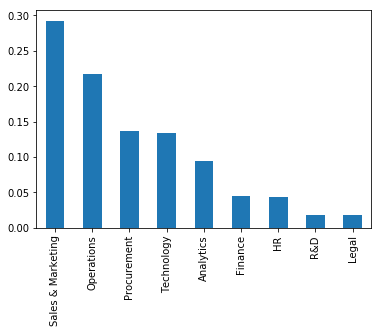

In [27]:
train_treated["department"].value_counts(normalize=True).plot.bar()
plt.show()

In [28]:
train_treated["department"].value_counts()

Sales & Marketing    14239
Operations           10547
Procurement           6641
Technology            6502
Analytics             4610
Finance               2219
HR                    2142
R&D                    893
Legal                  867
Name: department, dtype: int64

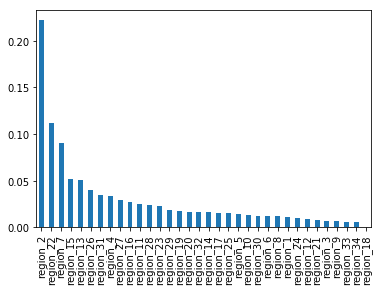

In [29]:
train_treated["region"].value_counts(normalize=True).plot.bar()
plt.show()

In [30]:
train_treated["region"].value_counts().sort_index()

region_1       553
region_10      614
region_11     1189
region_12      425
region_13     2463
region_14      770
region_15     2512
region_16     1319
region_17      742
region_18       24
region_19      838
region_2     10811
region_20      780
region_21      370
region_22     5435
region_23     1104
region_24      462
region_25      721
region_26     1966
region_27     1418
region_28     1143
region_29      896
region_3       331
region_30      602
region_31     1692
region_32      773
region_33      260
region_34      253
region_4      1626
region_5       690
region_6       579
region_7      4397
region_8       578
region_9       324
Name: region, dtype: int64

In [31]:
train_treated["education"].value_counts()

Bachelor's          33404
Master's & above    14798
Below Secondary       458
Name: education, dtype: int64

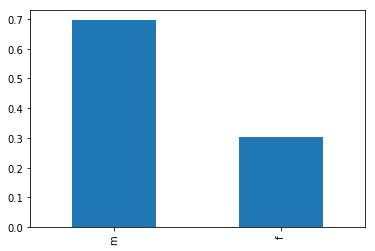

In [32]:
train_treated["gender"].value_counts(normalize=True).plot.bar()
plt.show()

In [33]:
train_treated["gender"].value_counts()

m    33852
f    14808
Name: gender, dtype: int64

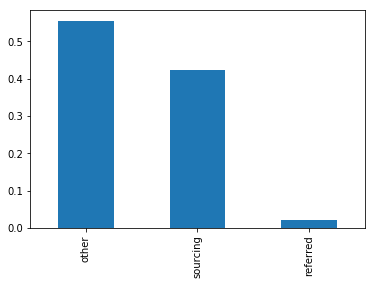

In [34]:
train_treated["recruitment_channel"].value_counts(normalize=True).plot.bar()
plt.show()

In [35]:
train_treated["recruitment_channel"].value_counts()

other       27017
sourcing    20623
referred     1020
Name: recruitment_channel, dtype: int64

### Scaling Numericals

In [36]:
# train_treated
numerical_treated = train_treated.select_dtypes(include = np.number)

In [37]:
cols = numerical_treated.drop(columns=["age","no_of_trainings","is_promoted"]).columns

In [ ]:
# cols = numerical_treated.columns 

In [38]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_scaling="True")
## df_r stores the robust scaled data

df_r = scaler.fit_transform(numerical_treated.drop(columns=["age","no_of_trainings","is_promoted"]))

df_r = pd.DataFrame(df_r, columns=cols)

df_r.head()

,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,2.0,0.6,1.0,0.0,-0.44
1,2.0,-0.2,0.0,0.0,0.00
2,0.0,0.4,0.0,0.0,-0.40
3,-2.0,1.0,0.0,0.0,-0.40
4,0.0,-0.6,0.0,0.0,0.52


In [43]:
df_r= pd.concat([df_r,train_treated[["age","no_of_trainings"]]],axis=1)

In [ ]:
# binned_num = numerical_treated[["age","no_of_trainings"]]

In [ ]:
# df_r = pd.concat([df_r,binned_num],axis=1)

### Encoding Nonnumericals

In [44]:
nonnumerical_treated = train_treated.select_dtypes(exclude = np.number)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# nonnumerical_treated_1 = nonnumerical_treated.copy(deep=True)

## LabelEncoding 

for x in list(nonnumerical_treated.iloc[:,:]):
    nonnumerical_treated[x] = le.fit_transform(nonnumerical_treated[x])

## Encoded categoricals
    
nonnumerical_treated

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,department,region,education,gender,recruitment_channel
0,7,31,2,0,2
1,4,14,0,1,0
2,7,10,0,1,2
3,7,15,0,1,0
4,8,18,0,1,0
5,0,11,0,1,2
6,4,12,0,0,0
7,4,27,2,1,2
8,0,12,0,1,0
9,7,0,2,1,2


#### Concat

In [ ]:
# stop

In [46]:
df_treated = pd.concat([df_r, nonnumerical_treated], axis=1)

In [ ]:
# df_treated

In [47]:
df_treated.shape

(54140, 12)

In [50]:
df_treated_dropped_na = df_treated.dropna()

In [49]:
df_treated.isna().sum()

previous_year_rating    5480
length_of_service       5480
KPIs_met >80%           5480
awards_won?             5480
avg_training_score      5480
age                     5480
no_of_trainings         5480
department              5480
region                  5480
education               5480
gender                  5480
recruitment_channel     5480
dtype: int64

In [51]:
df_treated_dropped_na.isna().sum()

previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
age                     0
no_of_trainings         0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
dtype: int64

In [52]:
df_treated_dropped_na.shape

(43180, 12)

In [48]:
target.shape

(48660,)

In [56]:
df_final = pd.concat([df_treated,target],axis=1)

In [ ]:
# df_treated.shape

In [ ]:
# target.dropna().shape

#### Majority Minority Split

In [57]:
df_minority = df_final[df_final["is_promoted"]==1]
df_majority = df_final[df_final["is_promoted"]==0]

In [58]:
df_majority.shape,df_minority.shape

((44428, 13), (4232, 13))

#### Resampling

In [59]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True,n_samples= int(4232*2), random_state=123) 

## new minority shape

df_minority_upsampled.shape

(8464, 13)

In [60]:
## concatenating new minority and majority

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [69]:
df_upsampled=df_upsampled.dropna()

In [ ]:
# target

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop("is_promoted", axis = 1), df_upsampled.is_promoted, test_size = 0.2, random_state = 42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## LogReg

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
log= LogisticRegression(class_weight="balanced",random_state=42)

In [73]:
log.fit(X_train,y_train)
ypred_log=log.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, ypred_log))
print(accuracy_score(y_test, ypred_log))

              precision    recall  f1-score   support

         0.0       0.87      0.53      0.66      7903
         1.0       0.18      0.56      0.28      1476

   micro avg       0.54      0.54      0.54      9379
   macro avg       0.52      0.55      0.47      9379
weighted avg       0.76      0.54      0.60      9379

0.536304510075701


In [75]:
## f1 being the harmonic mean of PR is the preferred metric 

from sklearn.metrics import f1_score

f1_score(y_test,ypred_log)

0.2752874520913181

## DTree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight="balanced")
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_score(y_test, y_pred_dtc)

0.8931655826847212

In [78]:
dtc_cv = (cross_val_score(dtc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

dtc_cv

0.8837707883441459

In [80]:
f1_score(y_test,y_pred_dtc)

0.701073985680191

In [81]:
print(classification_report(y_test, y_pred_dtc))
print(accuracy_score(y_test, y_pred_dtc))


              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93      7903
         1.0       0.63      0.80      0.70      1476

   micro avg       0.89      0.89      0.89      9379
   macro avg       0.79      0.85      0.82      9379
weighted avg       0.91      0.89      0.90      9379

0.8931655826847212


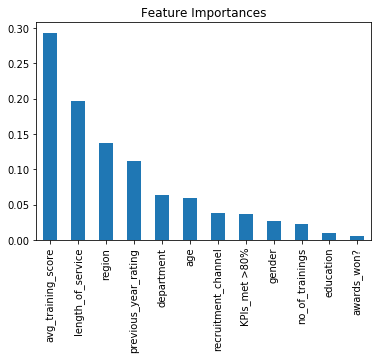

In [83]:
coef = pd.Series(dtc.feature_importances_,df_upsampled.drop('is_promoted', axis = 1).columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

## RF

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

In [85]:

## cross validating(k/10 folds) with rfc and obtaining the mean subsequently

cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy')

rfc_cv = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

rfc_cv

0.9579069888399341

In [86]:
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

f1_score(y_test,y_pred_rf)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      7903
         1.0       0.96      0.78      0.86      1476

   micro avg       0.96      0.96      0.96      9379
   macro avg       0.96      0.89      0.92      9379
weighted avg       0.96      0.96      0.96      9379

0.9594839535131677


0.8581030619865572

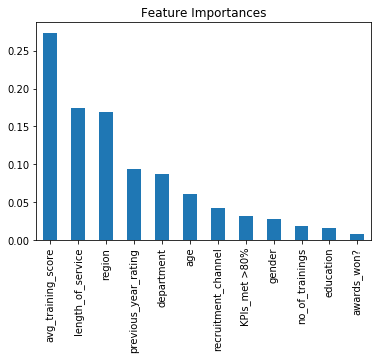

In [87]:
coef = pd.Series(rfc.feature_importances_,df_upsampled.drop('is_promoted', axis = 1).columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

In [88]:
# #
# X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_upsampled.drop(columns=["is_promoted","awards_won?"], axis = 1), df_upsampled.is_promoted, test_size = 0.2, random_state = 42)
# k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [89]:
# rfc_new = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)
# rfc_new.fit(X_train_new, y_train_new)
# y_pred_rf_new = rfc_new.predict(X_test_new)

# cross_val_score(rfc_new, X_train_new, y_train_new, cv=k_fold, n_jobs=2, scoring = 'accuracy')

array([0.95602345, 0.95282516, 0.95841109, 0.95867769, 0.95734471,
       0.95867769, 0.95441216, 0.963743  , 0.95414556, 0.96001066])

In [90]:
# f1_score(y_test_new,y_pred_rf_new)

0.8573562359970128

In [92]:
import pickle

filename= "final.pkl"
pickle.dump(rfc, open(filename, 'wb'))